<a href="https://colab.research.google.com/github/molecular-mar/molecular-mar.github.io/blob/master/Sesion9_3_PAQ24P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficas con matplotlib

Esta biblioteca es una de las más utilizadas para realizar gráficas. Forma parte del compendio SciPy. Consulta la documentación [aquí](https://matplotlib.org/stable/index.html).

In [ ]:
# Para comenzar, debemos importar la biblioteca
import matplotlib.pyplot as plt #Solamente importamos el modulo pyplot, una parte de todo el paquete

La siguiente celda nos ayudará a cargar los dataframes de algunos archivos de la sesión anterior. Recuerda subir los archivos correspondientes antes.

In [ ]:
import pandas as pd
datos_elementos = pd.read_csv('propiedades_quimicas.csv')
datos_valoracion = pd.read_excel('datos_valoracion.xlsx',skiprows=1, skipfooter=15, sheet_name='Hoja1')

## Funcionamiento básico

Grafiquemos el polinomio $x^5 + 4x^2 - 19$. Para poder graficar recuerda que necesitamos los pares de puntos $(x,y)$, que pueden estar en listas separadas:

In [ ]:
import numpy as np # Para generar una secuencia de valores
puntos_x = np.linspace(-10, 10, 100)
puntos_y = [x**5 + 4*x**2 -19 for x in puntos_x]

Como vimos previamente, podemos utilizar la instrucción `plt.plot(x,y)` para generar la gráfica:

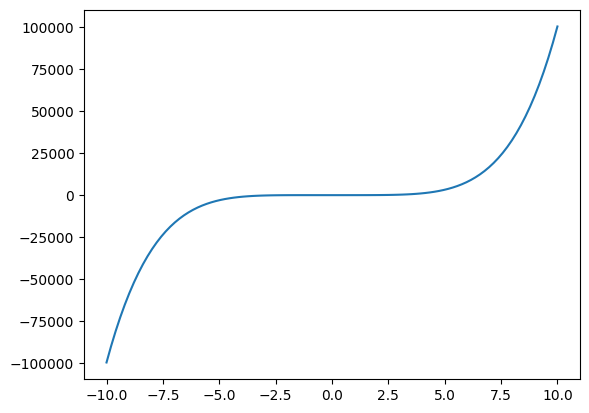

In [ ]:
plt.plot(puntos_x, puntos_y)

Probablemente en clases previas te han mencionado qué elementos debería de tener un gráfico para que este sea claro. A continuación veremos como añadir dichos elementos.

## Formato de gráficas

Los títulos de los ejes siempre son necesarios, ya que estos aclaran el significado de los valores en los mismos. Para agregarlos, podemos utilizar las instrucciones de la siguiente celda:

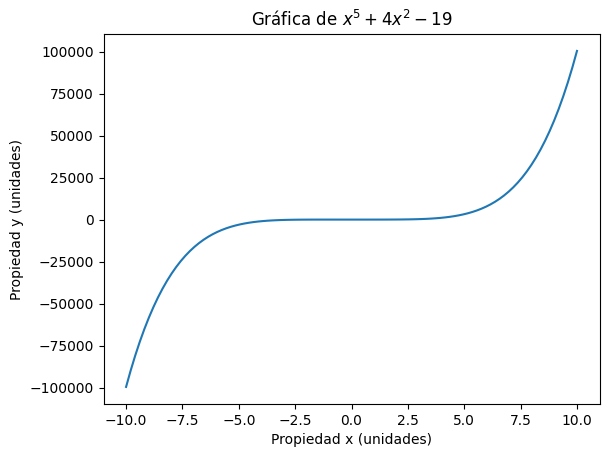

In [ ]:
plt.xlabel("Propiedad x (unidades)") # Para el eje x
plt.ylabel("Propiedad y (unidades)") # Para el eje y
plt.title("Gráfica de $x^5 + 4x^2 - 19$") # Titulo. Nota el uso de Latex para la ecuacion
plt.plot(puntos_x, puntos_y)

También podemos modificar los elementos del gráfico, como pueden ser la representación de los puntos y de los conectores, siendo modificables sus tamaños, colores y formas. Veamos la siguiente celda:

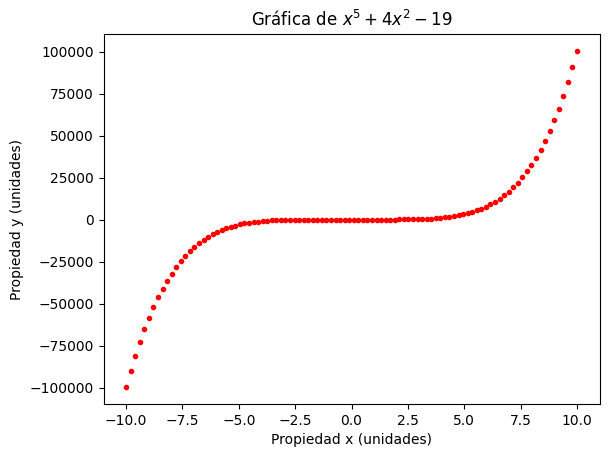

In [ ]:
plt.xlabel("Propiedad x (unidades)") # Para el eje x
plt.ylabel("Propiedad y (unidades)") # Para el eje y
plt.title("Gráfica de $x^5 + 4x^2 - 19$") # Titulo. Nota el uso de Latex para la ecuacion
plt.plot(puntos_x, puntos_y, marker="o", markeredgecolor="Red",
         markerfacecolor="Red", markersize=3, linestyle="")

Hay distintos tipos de marcadores (`s,v,^,.,o`), colores (`b,g,r,c,m,y,k,w`)

❓Prueba distintas formas, tamaños y colores de marcador para el gráfico previo.

También podemos modificar las lineas que conectan los marcadores (cada punto x,y):

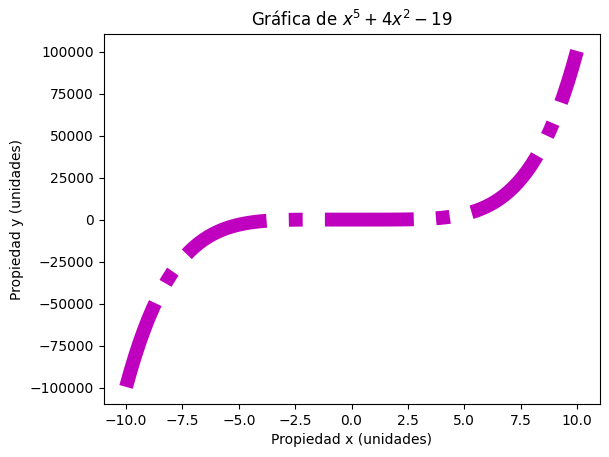

In [ ]:
plt.xlabel("Propiedad x (unidades)") # Para el eje x
plt.ylabel("Propiedad y (unidades)") # Para el eje y
plt.title("Gráfica de $x^5 + 4x^2 - 19$") # Titulo. Nota el uso de Latex para la ecuacion
plt.plot(puntos_x, puntos_y, marker="", linestyle="-.", color="m", linewidth="10")

Los tipos de linea disponibles son `'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'`.

Podemos guardar la gráfica generada con click derecho y seleccionando *Guardar imagen*. Si necesitas un tipo especial de archivo o una alta resolución, puedes usar la siguiente celda.

In [ ]:
#Para guardar la imagen
plt.xlabel("Propiedad x (unidades)") # Para el eje x
plt.ylabel("Propiedad y (unidades)") # Para el eje y
plt.title("Gráfica de $x^5 + 4x^2 - 19$") # Titulo. Nota el uso de Latex para la ecuacion
plt.plot(puntos_x, puntos_y, marker="", linestyle="-.", color="m", linewidth="10")
plt.savefig('curva1.png', format='PNG', dpi=600) # Aumenta dpi para mejorar la resolucion

Ahora realicemos una gráfica de los datos que están en nuestros archivos. De nuevo, lo que necesitamos son los pares de valores $x,y$:

In [ ]:
# Primero ordenamos los datos por el número atómico
datos_ordenados = datos_elementos.sort_values("Número Atómico")

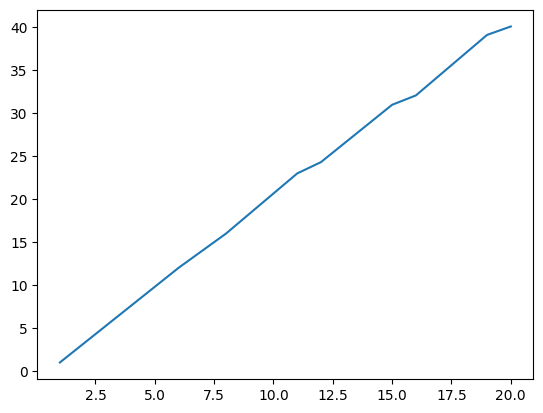

In [ ]:
plt.plot(datos_ordenados["Número Atómico"],datos_ordenados["Masa Atómica (u)"])

❓Adapta la gráfica anterior para que el marcador sea un triángulo verde, con títulos adecuados en los ejes y título de la gráfica.

Revisemos otro ejemplo, usando la función de onda ($\psi$) del orbital atómico 3s de hidrógeno ($r$ en Bohrs).

$$ \psi_{3s} = \frac{2}{27}\sqrt{3}(2r^{2/9} - 2r + 3)e^{-r/3} $$

![Densidad electrónica de orbitales s hidrogenoides](https://cdn.kastatic.org/ka-perseus-images/867daad52b2895a83b5f3723828dfd0403e78f53.jpg)

In [ ]:
#Definimos una funcion que evalue esta expresion
import math

def orbital_3S(r):
    wf = (2/27)*math.sqrt(3)*(2*r**2/9 - 2*r + 3)* math.exp(-
         r/3) #Podemos romper algunas expresiones
              #para que sean más faciles de leer
    return wf

In [ ]:
# Generemos algunos valores. Intentemos entender las siguientes expresiones:
r = np.linspace(1,30,50)
psi_3s = [orbital_3S(num) for num in r]

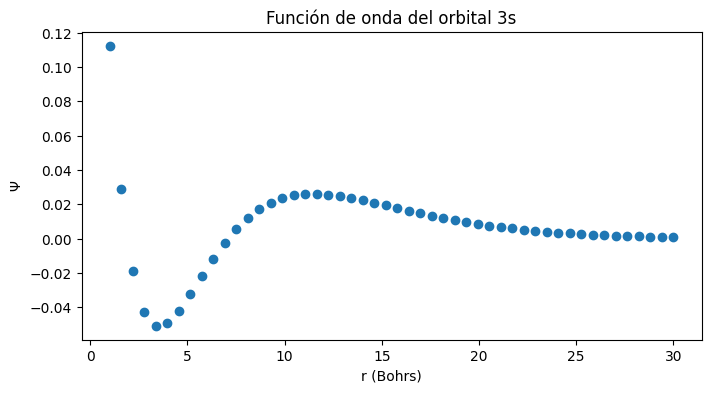

In [ ]:
# Usamos la función plot de plt
plt.figure(figsize=(8,4)) # Para cambiar el tamaño de la figura
plt.title("Función de onda del orbital 3s")
plt.xlabel("r (Bohrs)")
plt.ylabel("$\Psi$")# Notación de LaTeX
plt.plot(r,psi_3s,'o') #Argumentos: x, y, marcador

## Tipos de gráficos

### Gráfico de barras

Veamos un gráfico de este tipo para las electronegatividades de nuestro archivo `datos_elementos`. Queda como tarea para el estudiante investigar como girar las etiquetas para que aparezcan verticales.

Text(0.5, 1.0, 'Electronegatividades de los elementos')

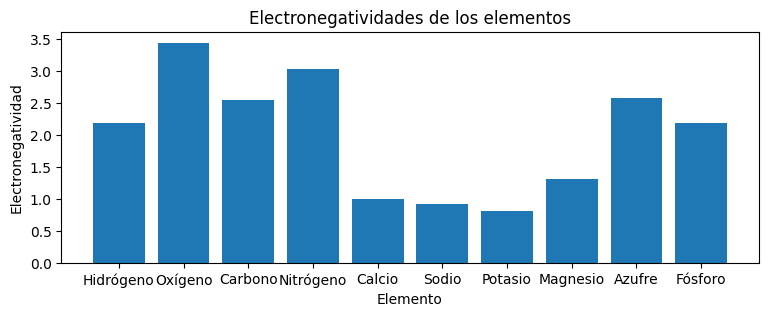

In [ ]:
plt.figure(figsize=(9,3))
#Para generar gráficos de barras
plt.bar(datos_elementos['Elemento'], datos_elementos['Electronegatividad'])
plt.xlabel('Elemento')
plt.ylabel('Electronegatividad')
plt.title('Electronegatividades de los elementos')

## Gráficas 3D

También podemos realizar gráficas en tres dimensiones. Veamos como ejemplo la gráfica de la siguiente superficie:

In [ ]:
import numpy as np

x = np.arange(-10, 10)
y = np.arange(-10, 10)
X, Y = np.meshgrid(x, y)
Z = 1 - X**2 - Y**2 # Ecuacion de la superficie

Text(0.5, 0, 'Eje Z')

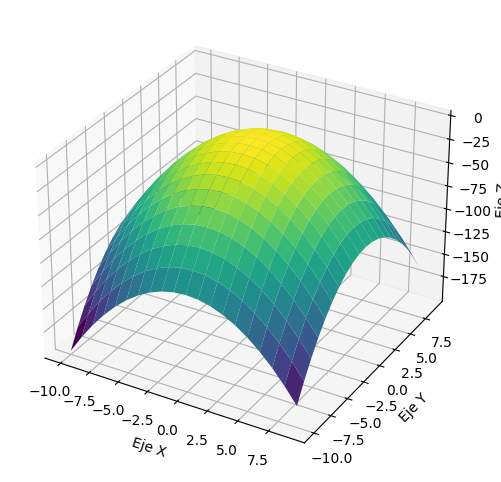

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
